In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.nunique()

,0
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


<Axes: >

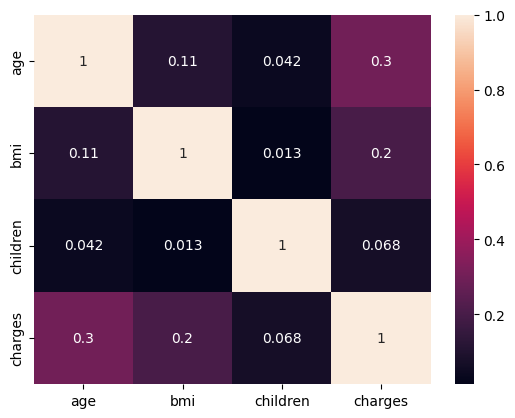

In [7]:
num_col = [col for col in df.columns if df[col].dtype != 'object']

sns.heatmap(df[num_col].corr(),annot = True)

<BarContainer object of 1338 artists>

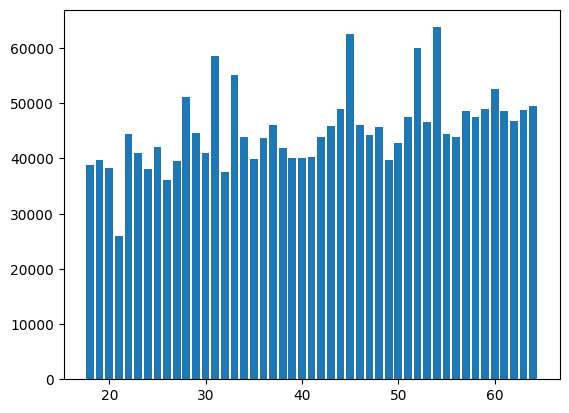

In [10]:
plt.bar(df.age,df.charges)

<BarContainer object of 1338 artists>

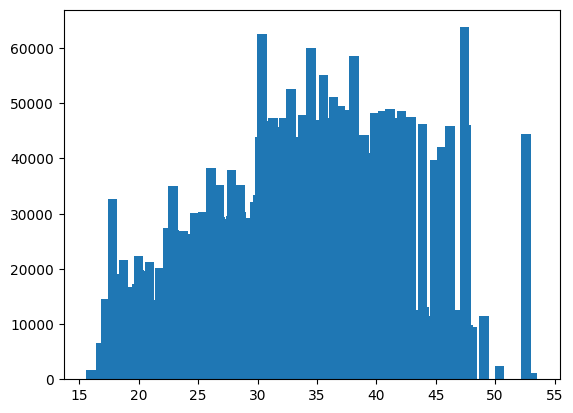

In [11]:
plt.bar(df.bmi,df.charges)

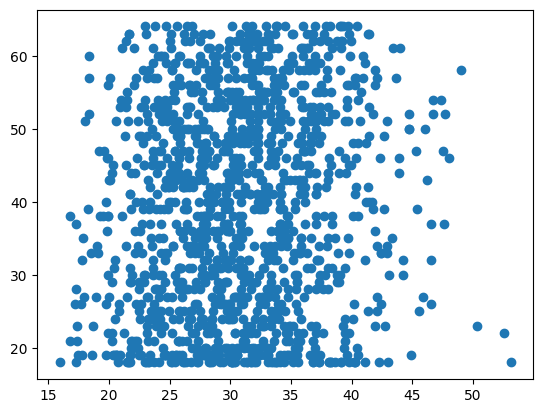

In [13]:
plt.scatter(df.bmi,df.age)

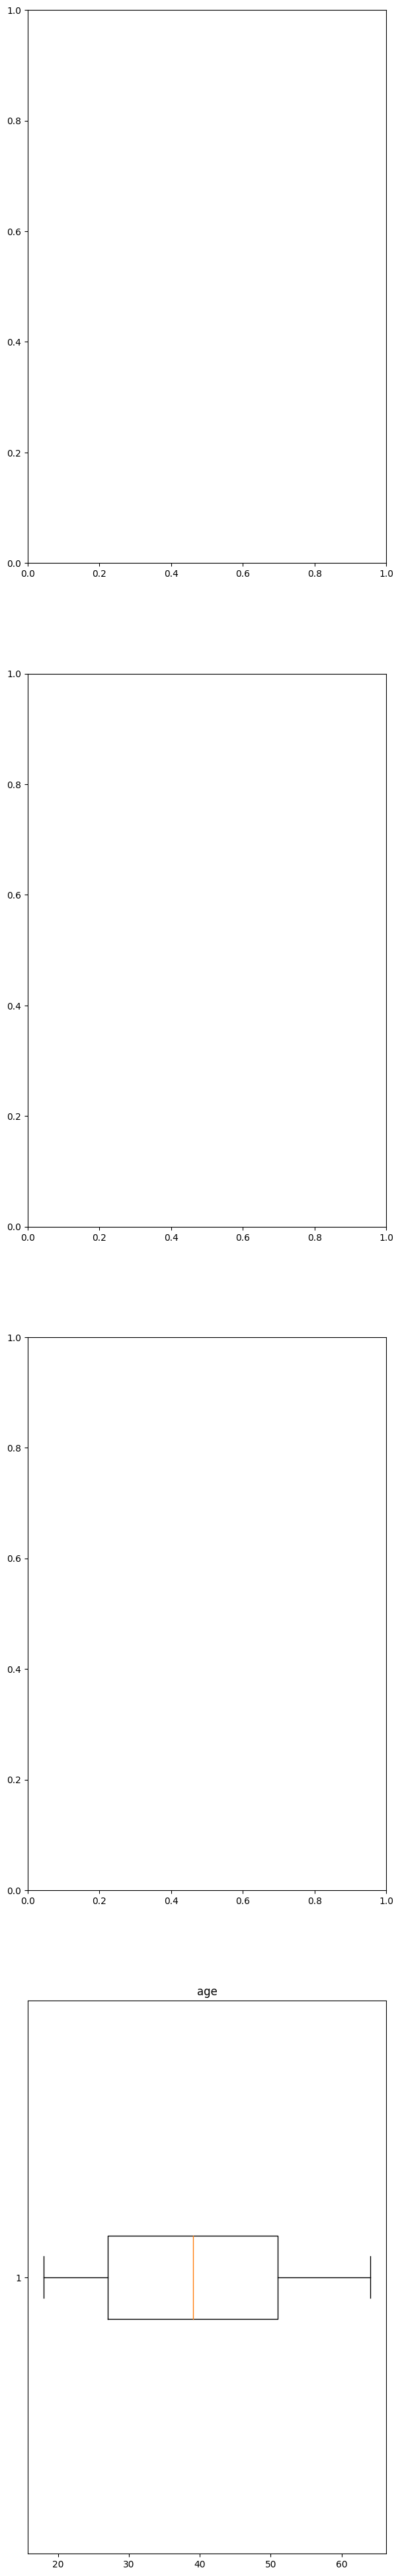

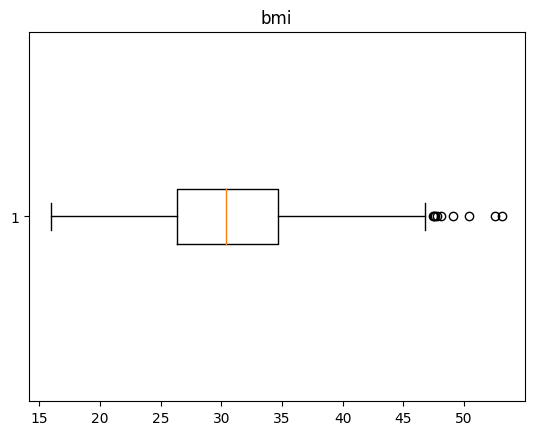

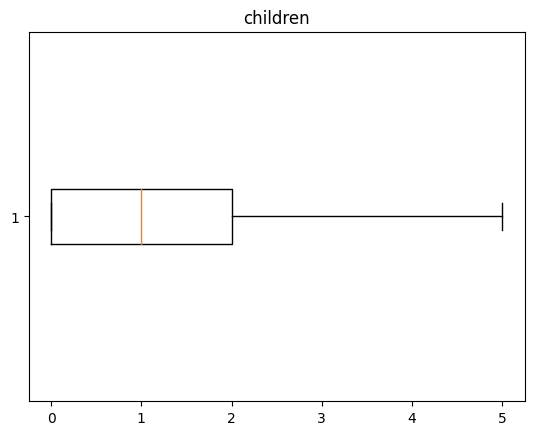

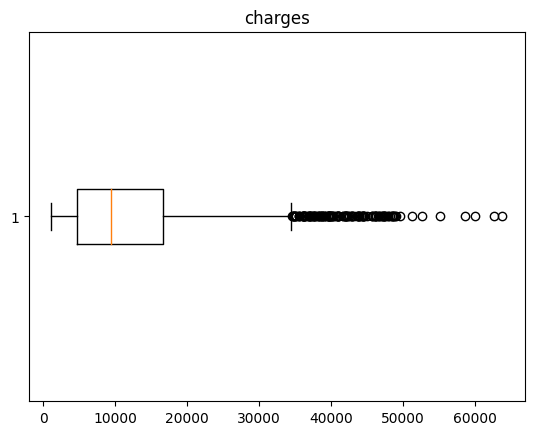

In [15]:
fig,axs = plt.subplots(len(num_col),1,figsize = (7,50))

for i,j in zip(num_col,range(len(num_col))):
  plt.title(i)
  axs[j] = plt.boxplot(df[i],vert = False)
  plt.show()

In [16]:
mean = np.mean(df['bmi'])
std = np.std(df['bmi'])

lower = mean - 2 * std
upper = mean + 2 * std


mean = np.mean(df['charges'])
std = np.std(df['charges'])

lower = mean - 2 * std
upper = mean + 2 * std

df2 = df[(df['bmi'] >= lower) & (df['bmi'] <= upper) & (df['charges'] >= lower) & (df['charges'] <= upper)]

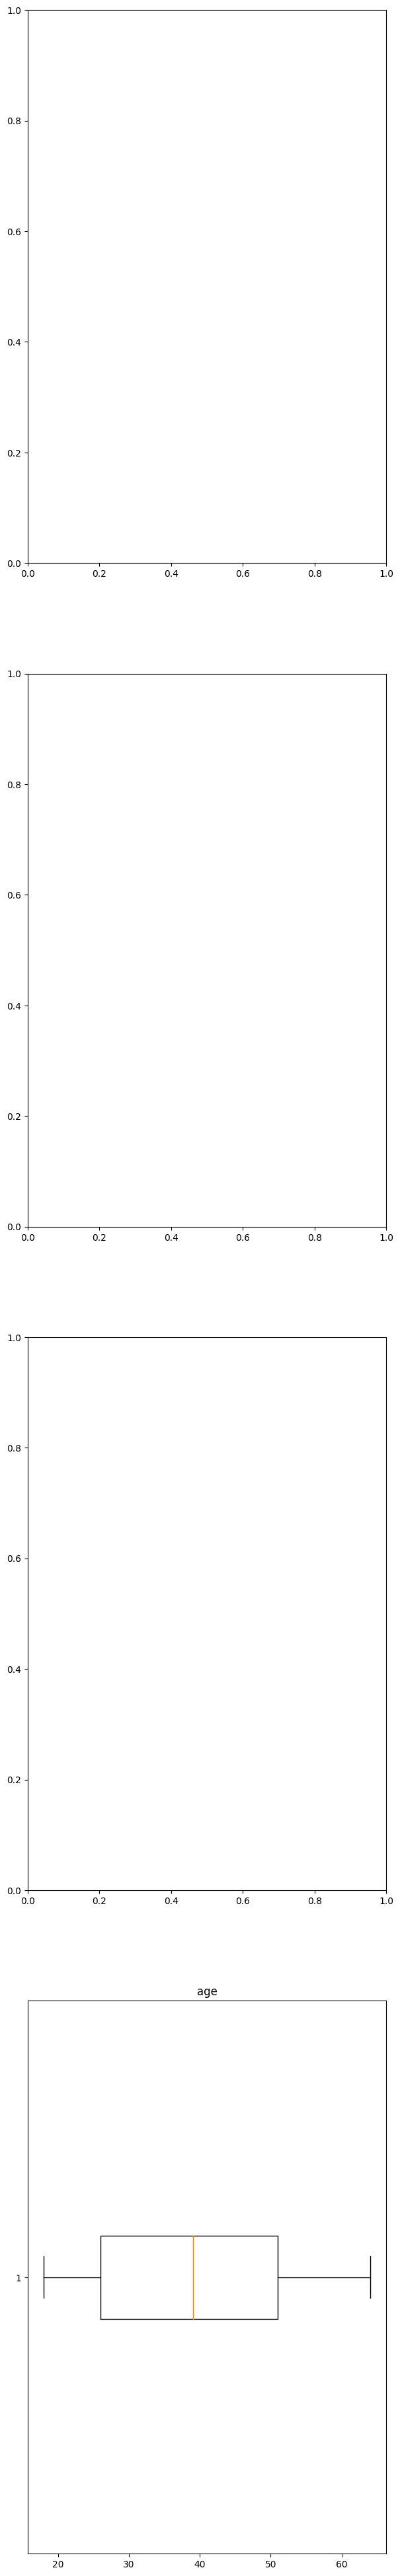

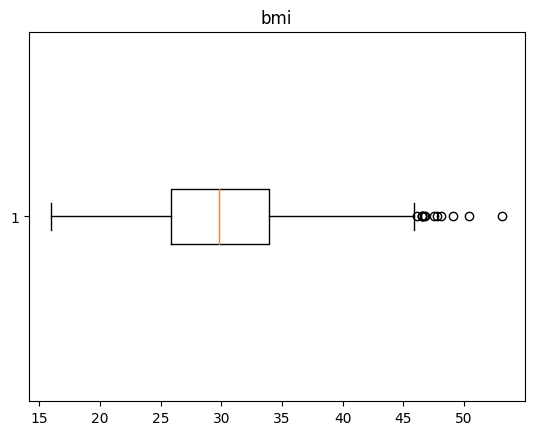

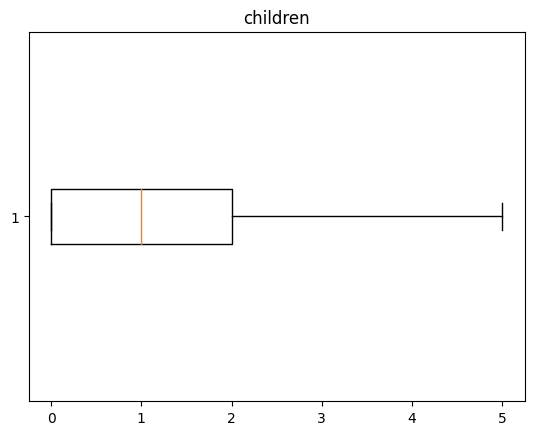

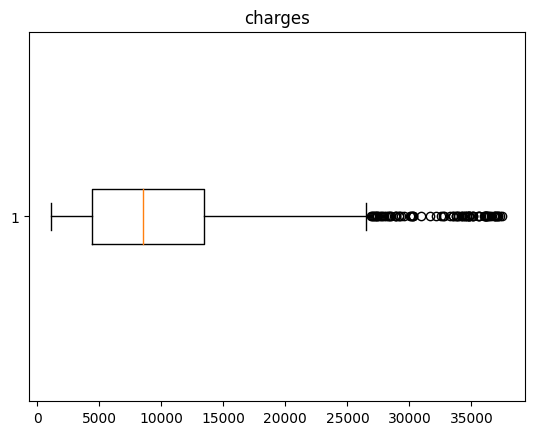

In [17]:
num_col = [col for col in df2.columns if df2[col].dtype != 'object']

fig,axs = plt.subplots(len(num_col),1,figsize = (7,50))

for i,j in zip(num_col,range(len(num_col))):
  plt.title(i)
  axs[j] = plt.boxplot(df2[i],vert = False)
  plt.show()

In [18]:
cat_col = [col for col in df2.columns if df2[col].dtype == 'object']

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for col in cat_col:
  df2[col] = encoder.fit_transform(df2[col])

df2.head()

<ipython-input-18-1bf3df9c6a01>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col] = encoder.fit_transform(df2[col])
<ipython-input-18-1bf3df9c6a01>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col] = encoder.fit_transform(df2[col])
<ipython-input-18-1bf3df9c6a01>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled = scaler.fit_transform(df2)

scaled_pd = pd.DataFrame(scaled,columns = df2.columns)

scaled_pd.head()

,age,sex,bmi,children,smoker,region,charges
0,0.021739,0.0,0.321227,0.0,1.0,1.000000,0.433724
1,0.000000,1.0,0.479150,0.2,0.0,0.666667,0.016610
2,0.217391,1.0,0.458434,0.6,0.0,0.666667,0.091559
3,0.326087,1.0,0.181464,0.0,0.0,0.333333,0.574040
4,0.304348,1.0,0.347592,0.0,0.0,0.333333,0.075529


In [20]:
X = scaled_pd.drop(columns = 'charges')
y = scaled_pd.charges

In [21]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

lr = LinearRegression()

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

print(mean_absolute_error(y_test,y_pred))

0.09161138350336215


In [31]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 3)

X_train1 = poly.fit_transform(X_train)

X_test1 = poly.fit_transform(X_test)

lir = LinearRegression()

lir.fit(X_train,y_train)

y_pred = lir.predict(X_test)

print(mean_absolute_error(y_test,y_pred))

0.09161138350336215


In [24]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV

params = {
    'C' : [0.1,1,10],
    'kernel' : ['linear','rbf','kernel','sigmoid'],
    'gamma' : [1,0.1,0.01]
}

random = RandomizedSearchCV(SVR(),params,cv = 3,scoring = 'accuracy',verbose = 3,n_jobs = -1)

random.fi(X_train,y_train)

print(random.best_params_)
print(random.best_estimator_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
{'kernel': 'sigmoid', 'gamma': 0.01, 'C': 1}
SVR(C=1, gamma=0.01, kernel='sigmoid')


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
6 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_pa

In [26]:
svr = SVR(C=1, gamma=0.01, kernel='sigmoid')

from sklearn.ensemble import AdaBoostRegressor

ada_boost = AdaBoostRegressor(
    estimator = svr,
    n_estimators = 50,
    learning_rate = 1.0,
    random_state = 42
)

ada_boost.fit(X_train,y_train)

y_pred = ada_boost.predict(X_test)

print(mean_absolute_error(y_test,y_pred))

0.11533942015059713


In [32]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

param_grids = {
    'max_depth' : list(range(2,7)),
    'max_leaf_nodes' : list(range(2,100)),
    'min_samples_split' : [2,3,4]
}

random_search = RandomizedSearchCV(dtr,param_grids,cv = 3,scoring = 'accuracy',verbose = 3,n_jobs = -1)

random_search.fit(X_train,y_train)

print(random_search.best_params_)
print(random_search.best_estimator_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
{'min_samples_split': 3, 'max_leaf_nodes': 58, 'max_depth': 2}
DecisionTreeRegressor(max_depth=2, max_leaf_nodes=58, min_samples_split=3)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


In [33]:
dtr = DecisionTreeRegressor(max_depth=2, max_leaf_nodes=58, min_samples_split=3)

ada = AdaBoostRegressor(
    estimator = dtr,
    n_estimators = 50,
    learning_rate = 1.0,
    random_state = 42
)

ada.fit(X_train,y_train)

y_pred = ada.predict(X_test)

print(mean_absolute_error(y_test,y_pred))

0.11629347240662476
